<a href="https://colab.research.google.com/github/19IT124/19IT124_19IT125_IT450_Market_Basket_Analysis/blob/main/Market_basket_analysys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
# mount google drive to colab notebook
 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
%matplotlib inline

In [75]:
df=pd.read_csv("/content/gdrive/MyDrive/sem-7/Train_UWu5bXk.csv")
test=pd.read_csv("/content/gdrive/MyDrive/sem-7/Test_u94Q5KV.csv")
train=df

In [76]:
df.head()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [78]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [79]:
idsUnique=len(set(df.Item_Identifier))
idsTotal=len(df)
print("duplicate ids "+str(idsTotal-idsUnique))

duplicate ids 6964


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Item Outlet Sales Distribution')

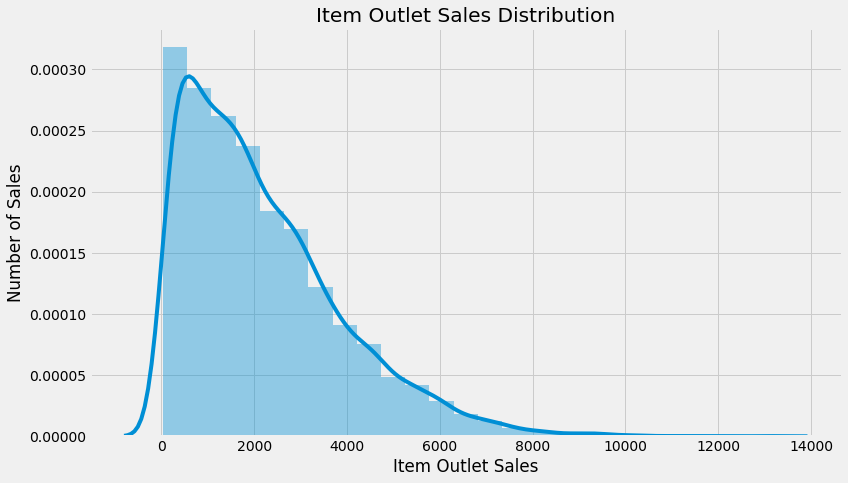

In [80]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.Item_Outlet_Sales,bins=25)
plt.ticklabel_format(style='plain',axis='x',scilimits=(0,1))
plt.xlabel("Item Outlet Sales")
plt.ylabel("Number of Sales")
plt.title("Item Outlet Sales Distribution")

In [81]:
print("Skew is:"+str(df.Item_Outlet_Sales.skew()))
print("Kurtosis is:"+str(df.Item_Outlet_Sales.kurt()))

Skew is:1.1775306028542796
Kurtosis is:1.6158766814287264


In [82]:
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [83]:
corr=numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [84]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


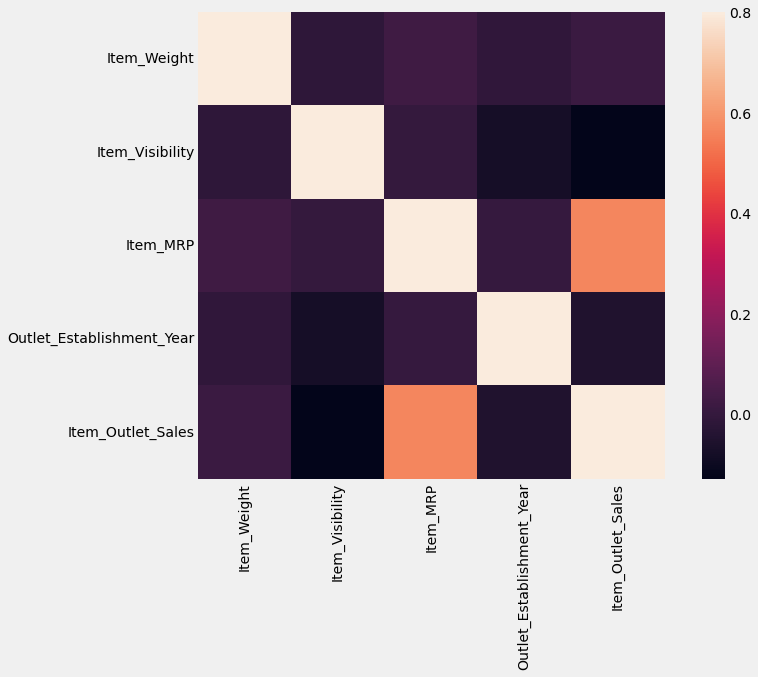

In [85]:
#correlation matrix
f,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corr,vmax=0.8,square=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


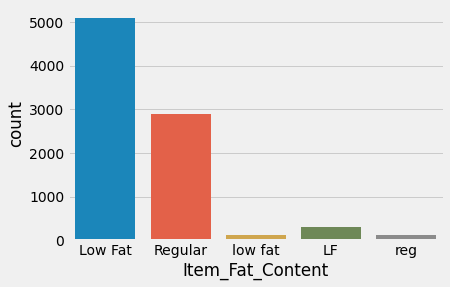

In [86]:
sns.countplot(df.Item_Fat_Content)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

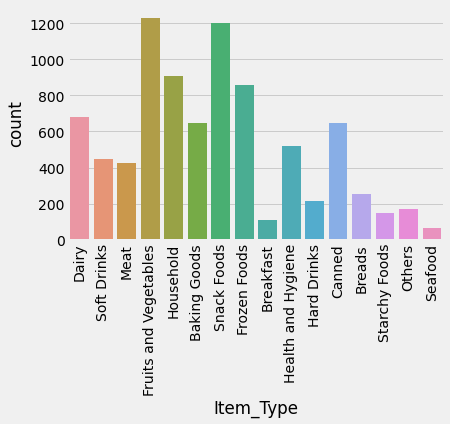

In [87]:
sns.countplot(df.Item_Type)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


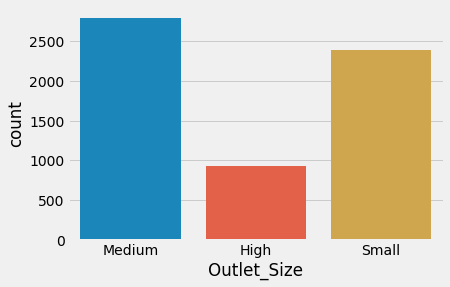

In [88]:
sns.countplot(df.Outlet_Size)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

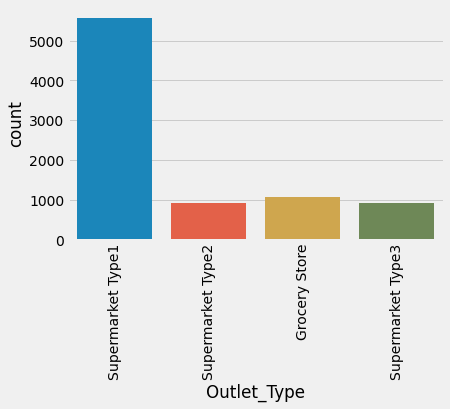

In [89]:
sns.countplot(df.Outlet_Type)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


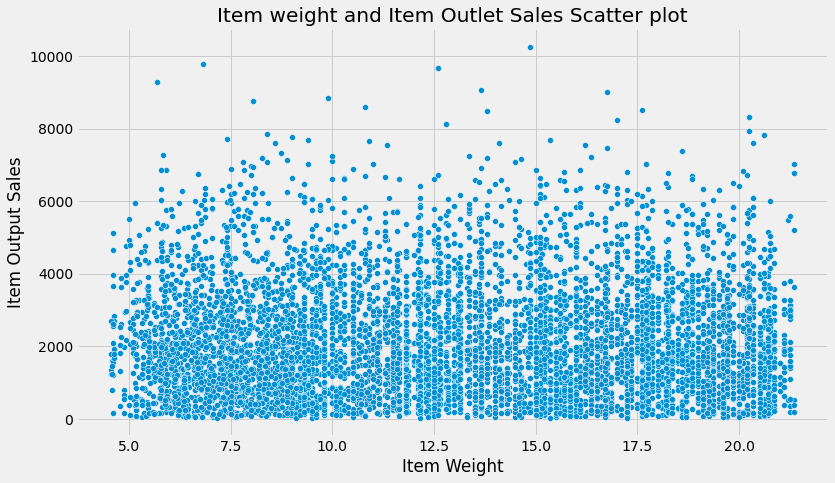

In [90]:
plt.figure(figsize=(12,7))
plt.xlabel("Item Weight")
plt.ylabel("Item Output Sales")
plt.title("Item weight and Item Outlet Sales Scatter plot")
sns.scatterplot(df.Item_Weight,df.Item_Outlet_Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


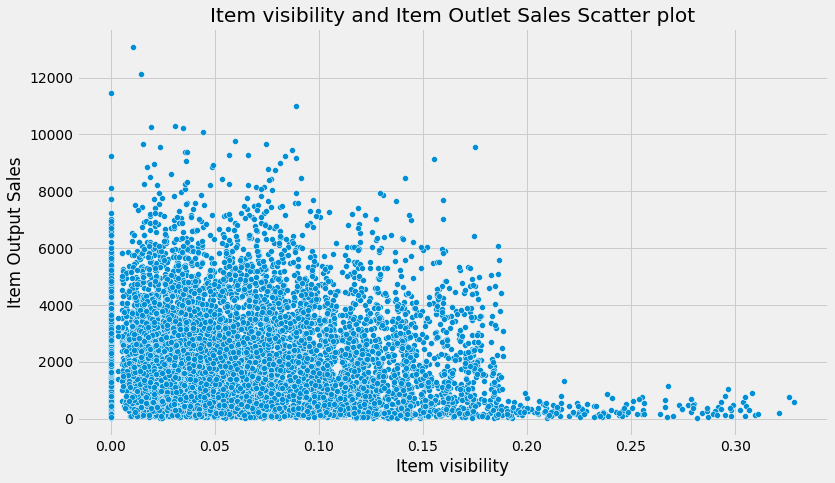

In [91]:
plt.figure(figsize=(12,7))
plt.xlabel("Item visibility")
plt.ylabel("Item Output Sales")
plt.title("Item visibility and Item Outlet Sales Scatter plot")
sns.scatterplot(df.Item_Visibility,df.Item_Outlet_Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

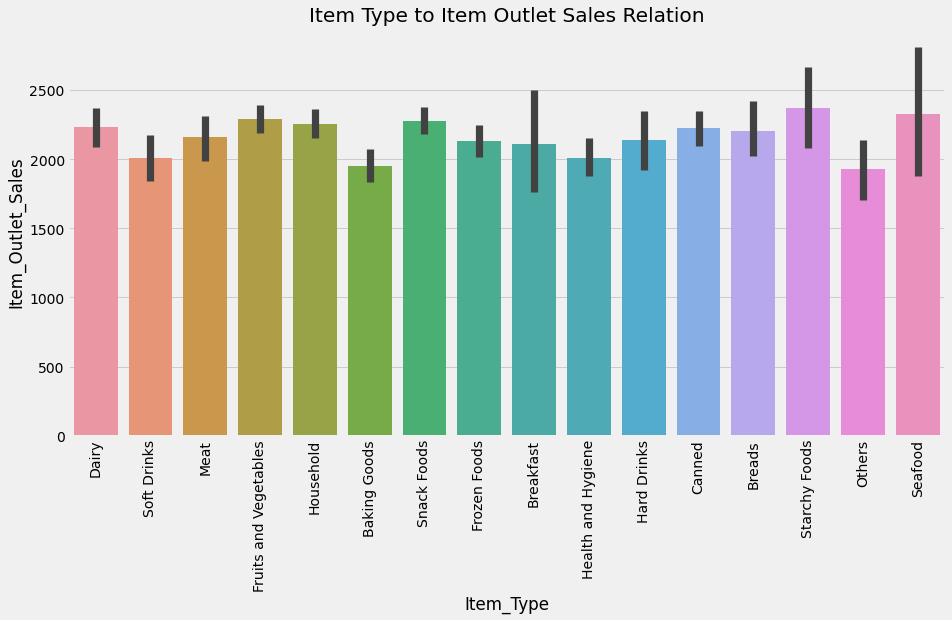

In [92]:
plt.figure(figsize=(14,7))
plt.xlabel("Item Type")
plt.ylabel("Item Outlet Sales")
plt.title("Item Type to Item Outlet Sales Relation")
sns.barplot(df.Item_Type,df.Item_Outlet_Sales)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

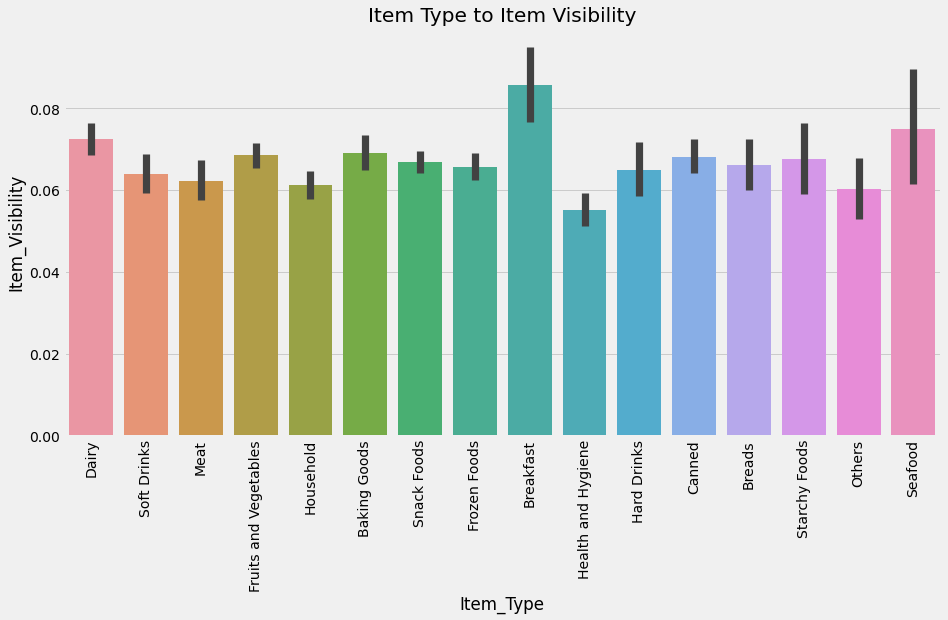

In [93]:
plt.figure(figsize=(14,7))
plt.xlabel("Item Type")
plt.ylabel("Item Visibility")
plt.title("Item Type to Item Visibility")
sns.barplot(df.Item_Type,df.Item_Visibility)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

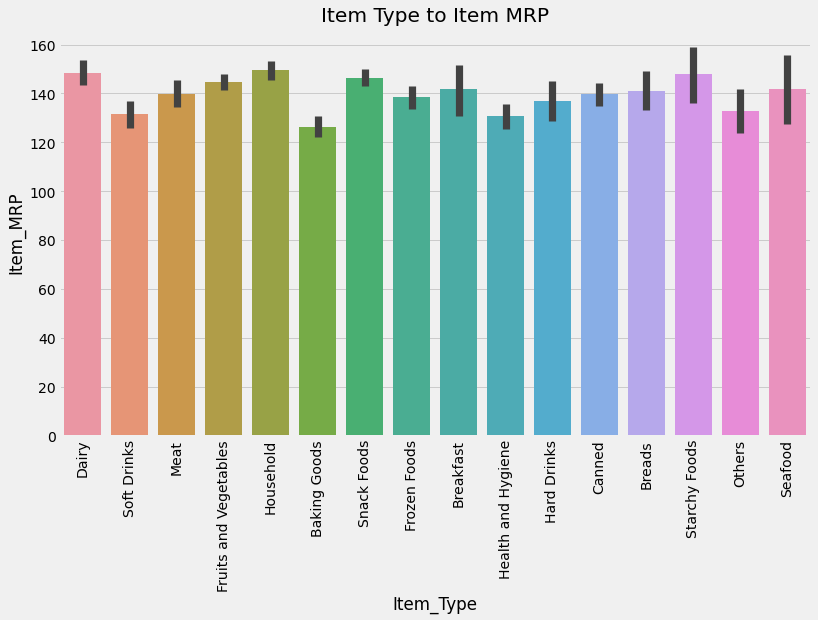

In [94]:
plt.figure(figsize=(12,7))
plt.xlabel("Item Type")
plt.ylabel("Item MRP")
plt.title("Item Type to Item MRP")
sns.barplot(df.Item_Type,df.Item_MRP)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


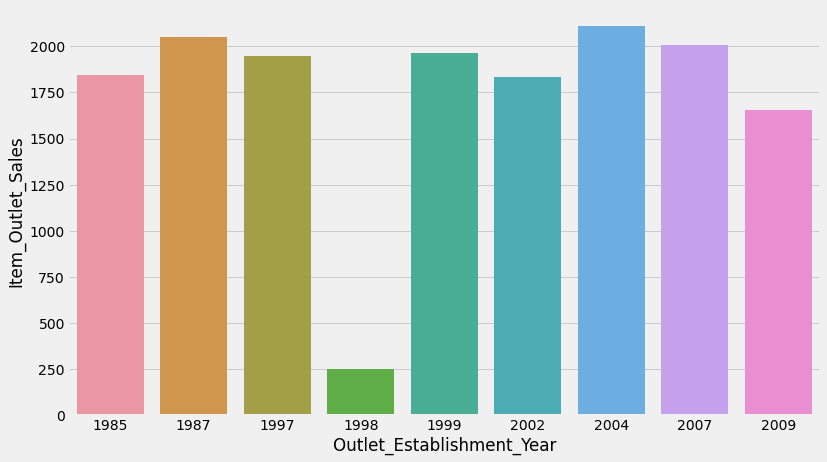

In [95]:
plt.figure(figsize=(12,7))
Outlet_Establishment_Year_pivot = \
op=df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
sns.barplot(op.index,op.Item_Outlet_Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


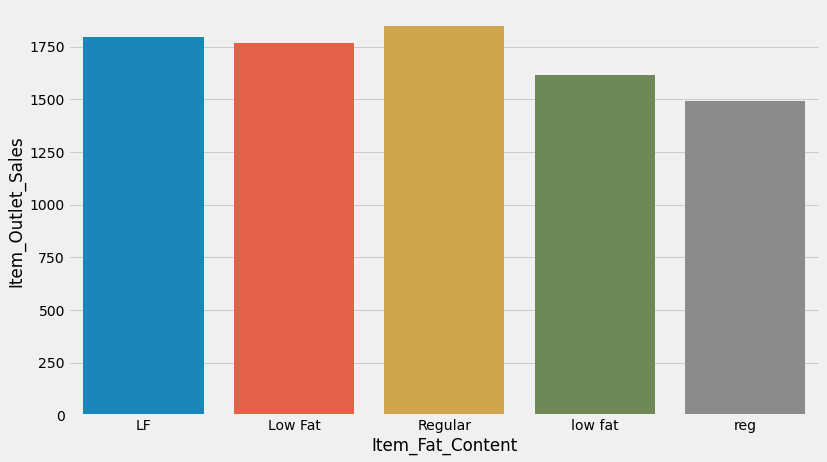

In [96]:
plt.figure(figsize=(12,7))
Item_Fat_Content_pivot = \
a=df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
sns.barplot(a.index,a.Item_Outlet_Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


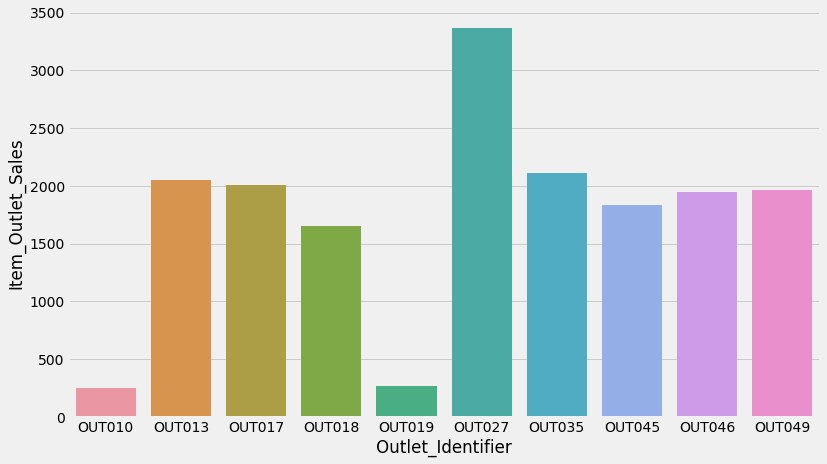

In [97]:
plt.figure(figsize=(12,7))
Outlet_Identifier_Pivot=\
op=df.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.median)
sns.barplot(op.index,op.Item_Outlet_Sales)

In [98]:
df.pivot_table(values='Outlet_Type',columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [99]:
df.pivot_table(values='Outlet_Type',columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


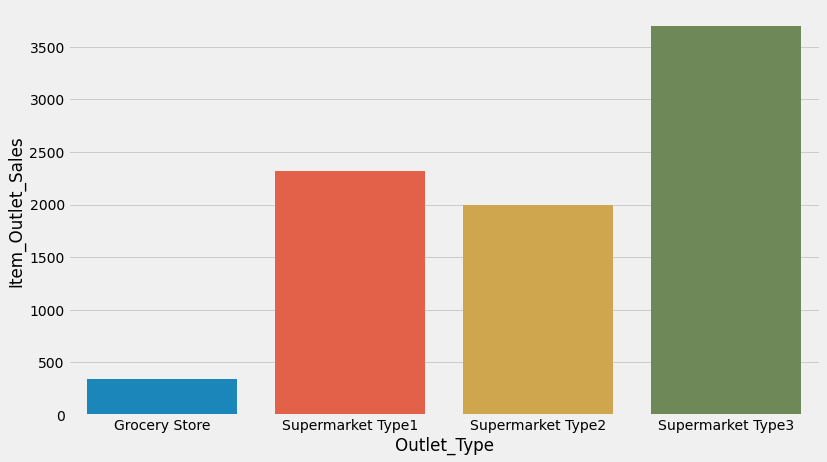

In [100]:
plt.figure(figsize=(12,7))
Outlet_Type_Pivot=\
op=df.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')
sns.barplot(op.index,op.Item_Outlet_Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


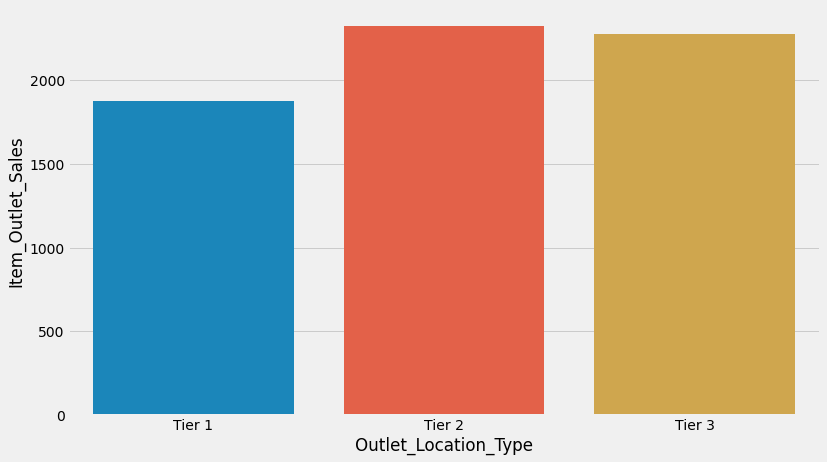

In [101]:
plt.figure(figsize=(12,7))
Outlet_LOcation_Type_Pivot=\
op=df.pivot_table(index='Outlet_Location_Type',values='Item_Outlet_Sales')
sns.barplot(op.index,op.Item_Outlet_Sales)

In [102]:
df.pivot_table(values='Outlet_Location_Type',columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


Preprocessing

In [103]:
train['source']='train'
test['source']='test'

data=pd.concat([train,test],ignore_index=True)

In [104]:
data.sample(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
3079,DRH11,5.980,Low Fat,0.075495,Hard Drinks,55.3614,OUT013,1987,High,Tier 3,Supermarket Type1,497.3526,train
5063,FDH02,NaN,Regular,0.000000,Canned,91.8488,OUT027,1985,Medium,Tier 3,Supermarket Type3,2716.4640,train
10799,NCR42,9.105,Low Fat,0.038450,Household,31.9900,OUT013,1987,High,Tier 3,Supermarket Type1,NaN,test
5415,FDW02,4.805,Regular,0.037853,Dairy,126.2704,OUT018,2009,Medium,Tier 3,Supermarket Type2,3629.9416,train
12259,FDN20,19.350,Low Fat,0.026235,Fruits and Vegetables,168.4474,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5972,FDT15,NaN,Regular,0.074730,Meat,183.7950,OUT019,1985,Small,Tier 1,Grocery Store,549.2850,train
4487,FDU15,13.650,Regular,0.000000,Meat,36.6532,OUT017,2007,NaN,Tier 2,Supermarket Type1,755.0172,train


In [105]:
data.isnull().sum()/len(data)*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

In [106]:
item_avg_weight=data.pivot_table(values="Item_Weight",columns='Item_Identifier')
print(item_avg_weight.T)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [107]:
data[:][data['Item_Identifier'] == 'DRI11']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train
1366,DRI11,NaN,Low Fat,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502,train
3127,DRI11,8.26,Low Fat,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012,train
5310,DRI11,8.26,Low Fat,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834,train
7022,DRI11,8.26,Low Fat,0.034398,Hard Drinks,115.7834,OUT035,2004,Small,Tier 2,Supermarket Type1,2073.3012,train
7192,DRI11,8.26,Low Fat,0.034544,Hard Drinks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1267.0174,train
8483,DRI11,8.26,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676,train
10246,DRI11,8.26,Low Fat,0.034404,Hard Drinks,113.5834,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
10674,DRI11,8.26,Low Fat,0.034376,Hard Drinks,115.3834,OUT013,1987,High,Tier 3,Supermarket Type1,NaN,test
12022,DRI11,8.26,Low Fat,0.034599,Hard Drinks,115.9834,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [108]:
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439


Remove Misiing

In [109]:
item_avg_weight=item_avg_weight.T
Weight=data['Item_Weight']
Identifier=data['Item_Identifier']

In [110]:
for i in range(len(Weight)):
    if(pd.isnull(Weight[i])):
        data['Item_Weight'][i]=item_avg_weight.iloc[item_avg_weight.index==Identifier[i]]['Item_Weight'].values[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Final #missing: 0


In [112]:
from scipy.stats import mode

outlet_size_mode=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x:x.mode())

In [113]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [114]:
print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 4016


In [115]:
outlet_size_mode=outlet_size_mode.T

In [116]:
Size=data['Outlet_Size']
Type=data['Outlet_Type']

for i in range(len(Size)):
    if(pd.isnull(Size[i])):
        data['Outlet_Size'][i]=outlet_size_mode.iloc[outlet_size_mode.index==Type[i]]['Outlet_Size'].values[0]
        
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Final #missing: 0


In [117]:
visibility_item_avg=data.pivot_table(values="Item_Visibility",columns="Item_Identifier").T

In [118]:
visibility=data.Item_Visibility
item=data.Item_Identifier

for i in range(len(visibility)):
    if(visibility[i]==0):
        data['Item_Visibility'][i]=visibility_item_avg.iloc[visibility_item_avg.index==item[i]]['Item_Visibility'].values[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Final #zeros: 0


In [122]:
data.Outlet_Establishment_Year=2013-data.Outlet_Establishment_Year

In [123]:
data.Outlet_Establishment_Year.describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Establishment_Year, dtype: float64

In [124]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',                                                      'NC':'Non-Consumable',                                                            'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [125]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())
print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',                                                      'reg':'Regular',
'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [126]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [127]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,15,Small,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Non-Edible,0.009780,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable


In [128]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Outlet']=le.fit_transform(data['Outlet_Identifier'])

var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

for i in var_mod:
    data[i]=le.fit_transform(data[i])

In [130]:
data.sample(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Item_Visibility_MeanRatio,Outlet
6331,FDA38,5.440,0,0.025459,Dairy,241.2538,OUT013,26,0,2,1,3124.5994,train,1,0.874001,1
13158,FDX43,5.655,0,0.074016,Fruits and Vegetables,168.0500,OUT049,14,1,0,1,NaN,test,1,1.000000,9
5987,NCK29,5.615,1,0.125965,Health and Hygiene,124.7730,OUT049,14,1,0,1,2956.1520,train,2,1.303075,9
7796,NCL30,18.100,1,0.048703,Household,125.9336,OUT027,28,1,2,3,7158.6816,train,2,0.994232,5
9155,NCB18,19.600,1,0.041525,Household,87.8514,OUT017,6,2,1,1,NaN,test,2,0.879677,2
4984,FDC26,10.195,0,0.126383,Canned,112.1886,OUT046,16,2,0,1,667.1316,train,1,0.929633,8
11459,FDY58,11.650,0,0.040000,Snack Foods,229.8694,OUT045,11,2,1,1,NaN,test,1,0.876503,7


In [131]:
data=pd.get_dummies(data,columns=var_mod)

In [132]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
O

In [133]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [134]:
train_df=pd.read_csv('train_modified.csv')
test_df=pd.read_csv('test_modified.csv')

In [135]:
from sklearn import cross_decomposition

In [154]:
target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']

from sklearn import metrics,model_selection

def model_fit(alg,dtrain,dtest,predictors,target,IDcol,filename):
    alg.fit(dtrain[predictors],dtrain[target])
    print(alg)
    dtrain_predictions=alg.predict(dtrain[predictors])
    
    Sq_train=(dtrain[target])**2
    
    cv_score=model_selection.cross_val_score(alg,dtrain[predictors],Sq_train,cv=20,scoring='neg_mean_squared_error')
    cv_score=np.sqrt(np.abs(cv_score))
    
    print("Model Score:\n")
    
    print("RMSE: %.4g" %np.sqrt(np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions))))
    
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [ ]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression(normalize=True)

predictors=train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
model_fit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

In [ ]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
model_fit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')

In [145]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model_fit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
Model Score:

RMSE: 3741
CV Score : Mean - 8.601e+06 | Std - 8.794e+05 | Min - 7.269e+06 | Max - 1.062e+07


In [146]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)

[07:34:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, n_estimators=1000)

In [156]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])
# make predictions
predictions = my_model.predict(test_df[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("merda.csv", index=False)

Mean Absolute Error : 208.12099989080727
RMSE : 1049


In [157]:
df=pd.read_csv("/content/gdrive/MyDrive/sem-7/merda.csv")

In [158]:
df.head()
df

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1649.299786
1,FDW14,OUT017,1435.912134
2,NCN55,OUT010,584.757765
3,FDQ58,OUT017,2649.110232
4,FDY38,OUT027,6280.890880
...,...,...,...
5676,FDB58,OUT046,2309.200798
5677,FDD47,OUT018,2232.847022
5678,NCO17,OUT045,1827.832845
5679,FDJ26,OUT017,3737.295775
